#Campus Recruitment Prediction With Machine Learning for MBA Students


 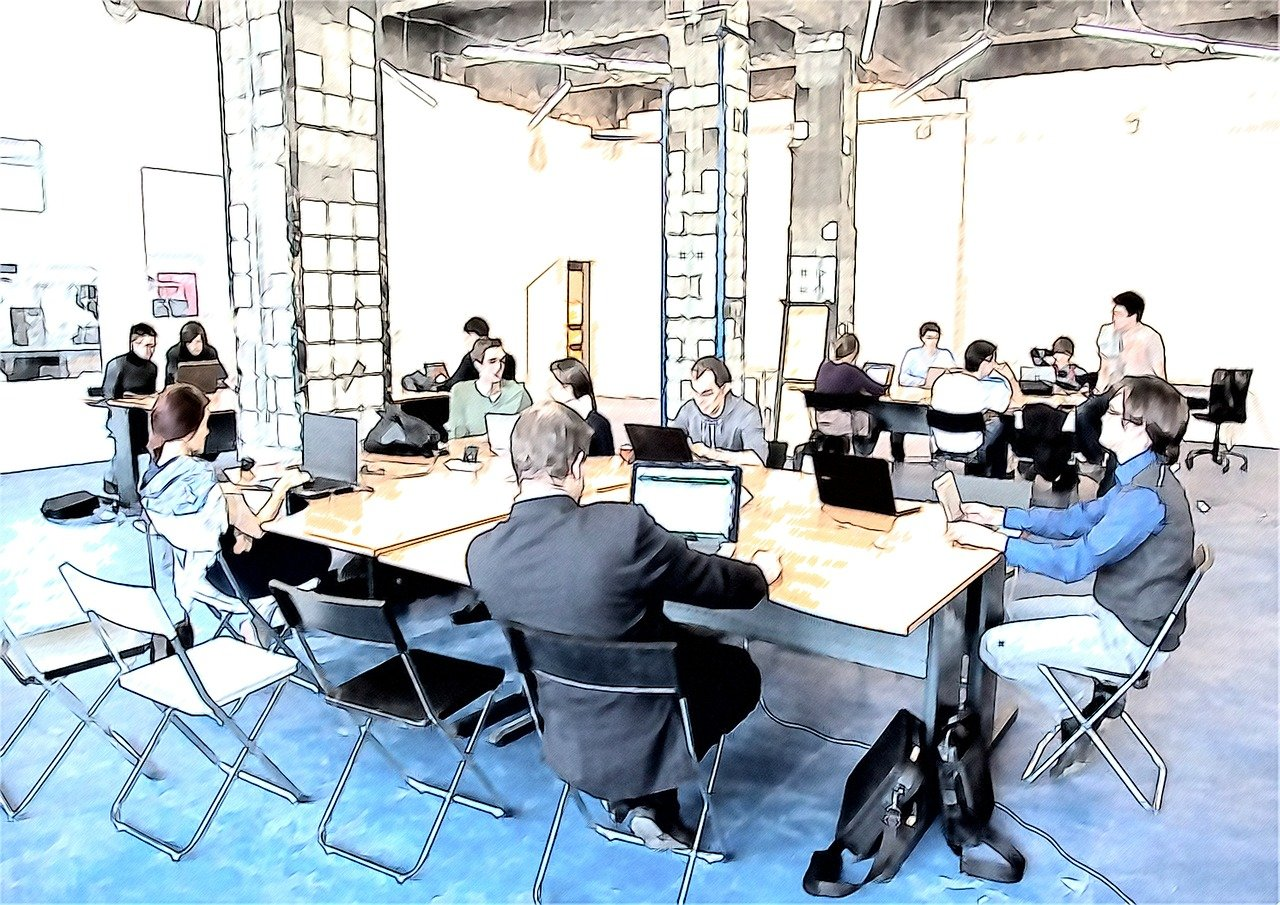

**Student Name:** Lelwala L.G.S.R. <br>
**Registration Number:** EG/2020/4047 <br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [46]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score



## Data Loading

In [47]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# Your code goes here
df = pd.read_csv('Placement_Data_Full_Class.csv')

# Print the first five rows of the loaded dataframe

# Your code goes here
print(df.head())

   sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  


In [48]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column

# Your code goes here
df.drop('sl_no', axis=1, inplace=True)


## Exploratory Data Analysis (EDA)

In [49]:
# Identify the shape of the loaded dataframe

# Your code goes here
print(df.shape)

(215, 14)


In [50]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:** 1. Categorical Features: Gender, ssc_b, hsc_b, hsc_s, degree_t, workex, specialisation, status
<br>2. Numerical Features: sl_no, ssc_p, hsc_p, degree_p, etest_p, mba_p, salary


In [51]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here
print(df.describe())

            ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000   
mean    67.303395   66.333163   66.370186   72.100558   62.278186   
std     10.827205   10.897509    7.358743   13.275956    5.833385   
min     40.890000   37.000000   50.000000   50.000000   51.210000   
25%     60.600000   60.900000   61.000000   60.000000   57.945000   
50%     67.000000   65.000000   66.000000   71.000000   62.000000   
75%     75.700000   73.000000   72.000000   83.500000   66.255000   
max     89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000  


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:** The reason is to avoid data leakage. If we use the entire dataset for visualization, the test set will be influenced by the visualization and the model will not be able to generalize well.


In [52]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Print number of training data points

# Your code goes here
print(f"Number of training data points: {X_train.shape[0]}")

Number of training data points: 172


In [54]:
# Print number of testing data points

# Your code goes here
print(f"Number of testing data points: {X_test.shape[0]}")

Number of testing data points: 43


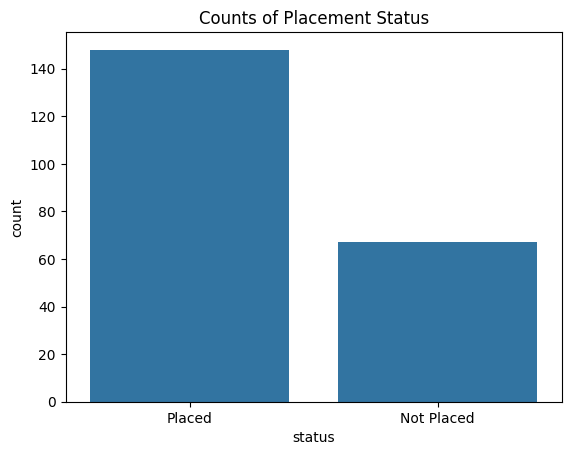

In [55]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here
sns.countplot(x='status', data=df)
plt.title('Counts of Placement Status')
plt.show()

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br> 1. The model may be biased towards the majority class, leading to poor classification performance on the minority class.
<br> 2. It might result in poor precision or recall for the minority class, affecting the overall effectiveness of the classifier.
<br> 3. High overall accuracy might be misleading due to the imbalance, not reflecting true model performance on the minority class.



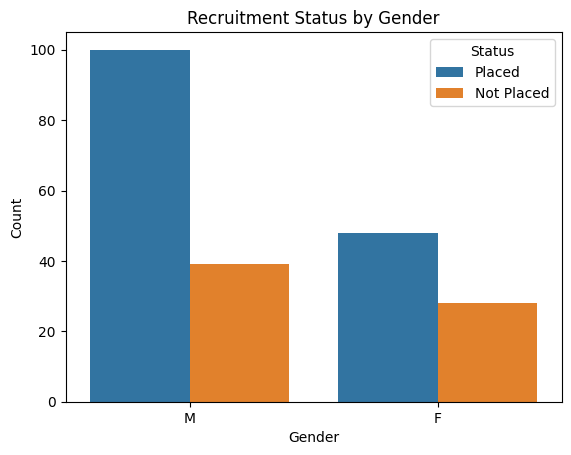

In [56]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly

# Your code goes here
sns.countplot(x='gender', hue='status', data=df)
plt.title('Recruitment Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

**Q:** Explain the observation from the above table.
> **A:**

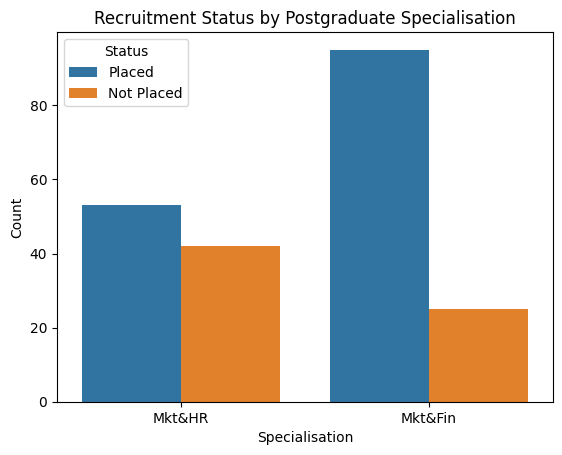

In [57]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
sns.countplot(x='specialisation', hue='status', data=df)
plt.title('Recruitment Status by Postgraduate Specialisation')
plt.xlabel('Specialisation')
plt.ylabel('Count')
plt.legend(title='Status')
plt.show()

**Q:** Inteprete the above results.
> **A:** <br> 1. The average percentage of students placed is 68.8%. 
<br> 2. The average salary offered is 288655.4.




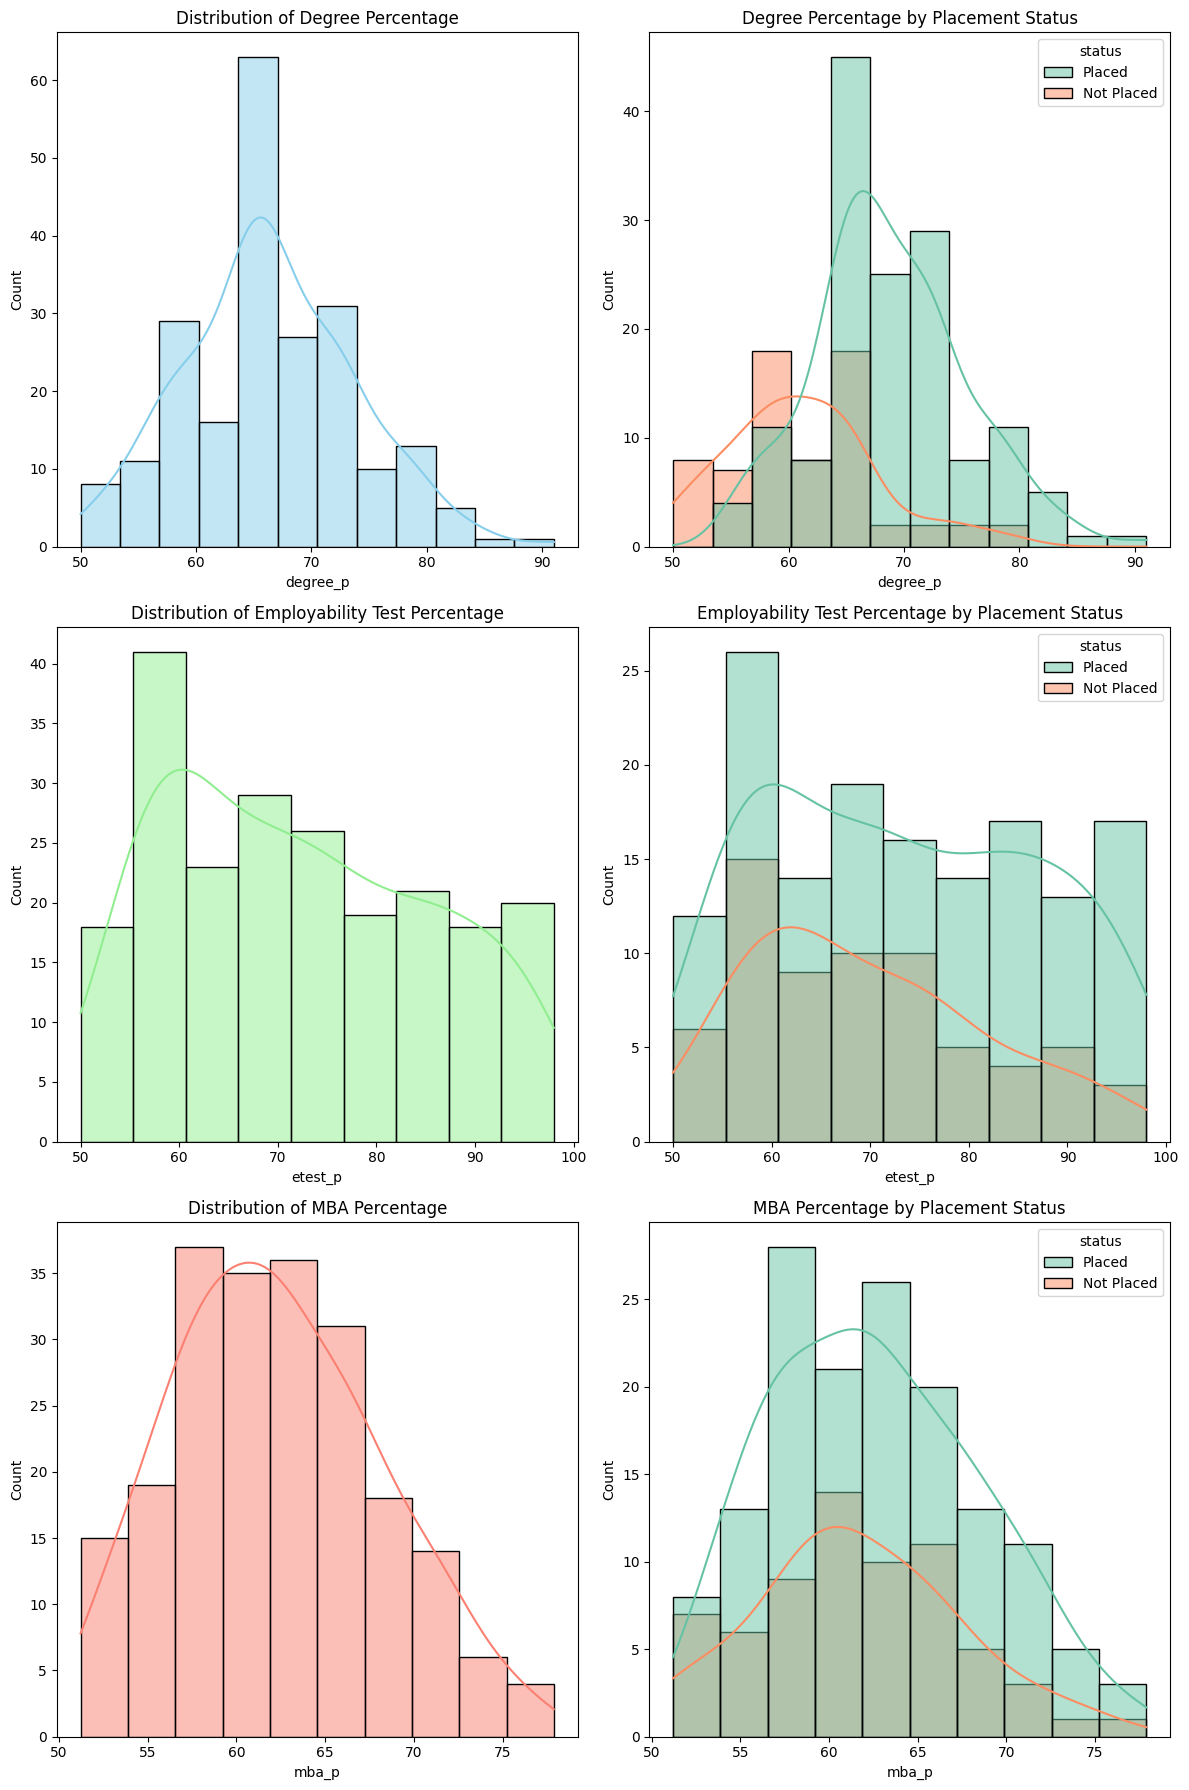

In [58]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here
fig, axs = plt.subplots(3, 2, figsize=(12, 18))


sns.histplot(data=df, x='degree_p', kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Distribution of Degree Percentage')


sns.histplot(data=df, x='etest_p', kde=True, ax=axs[1, 0], color='lightgreen')
axs[1, 0].set_title('Distribution of Employability Test Percentage')


sns.histplot(data=df, x='mba_p', kde=True, ax=axs[2, 0], color='salmon')
axs[2, 0].set_title('Distribution of MBA Percentage')


sns.histplot(data=df, x='degree_p', hue='status', kde=True, ax=axs[0, 1], palette='Set2')
axs[0, 1].set_title('Degree Percentage by Placement Status')


sns.histplot(data=df, x='etest_p', hue='status', kde=True, ax=axs[1, 1], palette='Set2')
axs[1, 1].set_title('Employability Test Percentage by Placement Status')

sns.histplot(data=df, x='mba_p', hue='status', kde=True, ax=axs[2, 1], palette='Set2')
axs[2, 1].set_title('MBA Percentage by Placement Status')

plt.tight_layout()
plt.show()

**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**<br> 1. The first plot shows the distribution of the Secondary Education percentage of the students. The distribution is right-skewed.
<br> 2. The second plot shows the distribution of the Higher Secondary Education percentage of the students. The distribution is right-skewed.
<br> 3. The third plot shows the distribution of the Degree percentage of the students. The distribution is right-skewed.
<br> 4. The fourth plot shows the distribution of the Employability test percentage of the students. The distribution is right-skewed.
<br> 5. The fifth plot shows the distribution of the MBA percentage of the students. The distribution is right-skewed.
<br> 6. The sixth plot shows the distribution of the Salary offered to the students. The distribution is right-skewed.



In [59]:
# Check for the null values in train set

# Your code goes here
null_values_in_train_set = X_train.isnull().sum()
print(null_values_in_train_set)


gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            55
dtype: int64


In [60]:
# Check for the null values in test set

# Your code goes here
null_values_in_test_set = X_test.isnull().sum()
print(null_values_in_test_set)

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            12
dtype: int64


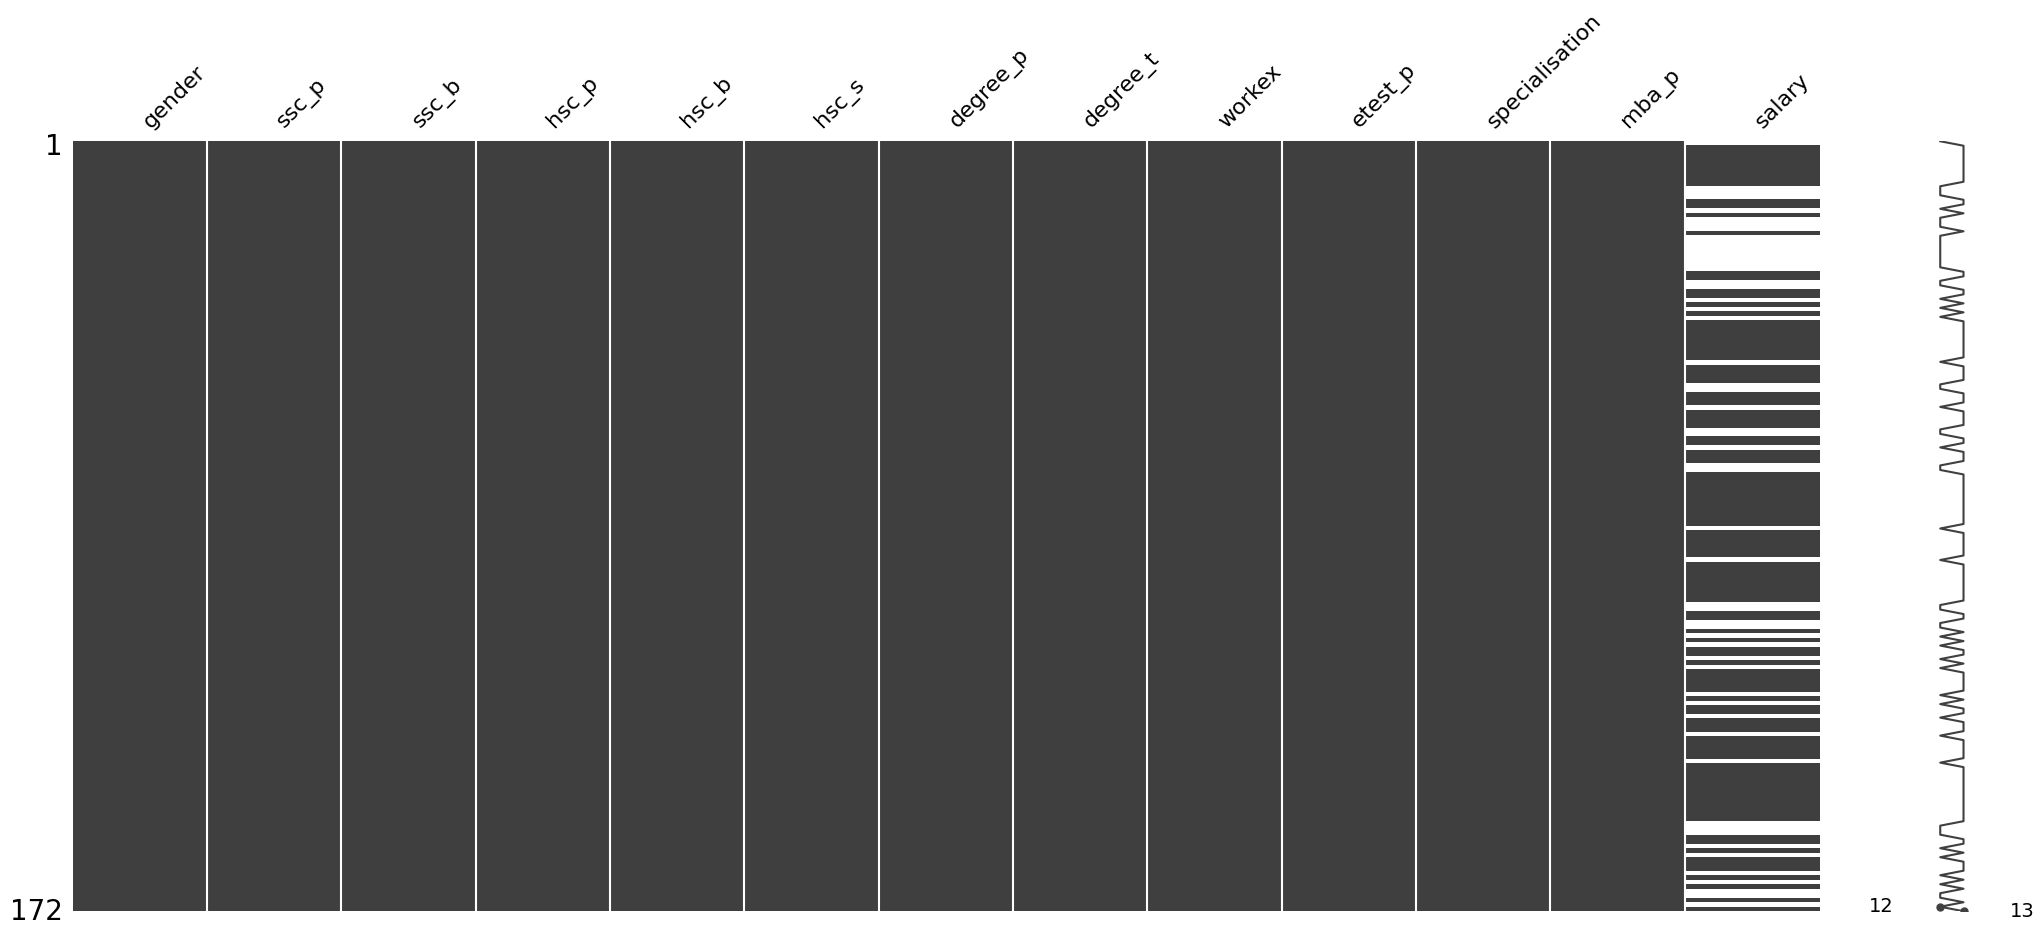

In [61]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
import missingno as msno

msno.matrix(X_train)
plt.show()


## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:**<br> The missing values are located in the salary column. Since the salary column is only applicable to students who are placed, the missing values are due to the fact that the students are not placed. Therefore, we can fill the missing values with 0, indicating that the students are not placed and hence no salary is offered.




In [62]:
# Handle the missing data

# Your code goes here
numerical_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

categorical_columns = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation'] 


for column in numerical_columns:
    median_value = X_train[column].median()
    X_train[column].fillna(median_value, inplace=True)


for column in categorical_columns:
    mode_value = X_train[column].mode()[0]
    X_train[column].fillna(mode_value, inplace=True)

X_train['salary'].fillna(0, inplace=True)
print(X_train.isnull().sum())

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


In [63]:
# Test the training dataset after processing the null values

# Your code goes here
remaining_nulls = X_train.isnull().sum()

print(remaining_nulls)

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


In [64]:
# Process the null values in the test set

# Your code goes here
for column in numerical_columns:
    median_value = X_train[column].median()  
    X_test[column].fillna(median_value, inplace=True)

for column in categorical_columns:
    mode_value = X_train[column].mode()[0] 
    X_test[column].fillna(mode_value, inplace=True)

X_test['salary'].fillna(0, inplace=True)


In [65]:
# Test the testing dataset after processing the null values

# Your code goes here
print(X_test.isnull().sum())

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
salary            0
dtype: int64


### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**<br> Can use one-hot encoding to encode the categorical features. This is because one-hot encoding is suitable for binary categorical features and it will not introduce any ordinality in the data. We will use the drop_first parameter to avoid the dummy variable trap.

In [66]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here
from sklearn.compose import make_column_transformer

# List the categorical features

# Your code goes here
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']

# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
from sklearn.preprocessing import OneHotEncoder

# Encode the training features

# Your code goes here
column_transformer = make_column_transformer(
    (OneHotEncoder(), categorical_features),
    remainder='passthrough' 
)

X_train_encoded = column_transformer.fit_transform(X_train)

X_test_encoded = column_transformer.transform(X_test)


In [67]:
# Check the datatypes of the the Pandas dataframe after the transformation

# Your code goes here
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=column_transformer.get_feature_names_out())

print(X_train_encoded_df.dtypes)

onehotencoder__gender_F                  float64
onehotencoder__gender_M                  float64
onehotencoder__ssc_b_Central             float64
onehotencoder__ssc_b_Others              float64
onehotencoder__hsc_b_Central             float64
onehotencoder__hsc_b_Others              float64
onehotencoder__hsc_s_Arts                float64
onehotencoder__hsc_s_Commerce            float64
onehotencoder__hsc_s_Science             float64
onehotencoder__degree_t_Comm&Mgmt        float64
onehotencoder__degree_t_Others           float64
onehotencoder__degree_t_Sci&Tech         float64
onehotencoder__workex_No                 float64
onehotencoder__workex_Yes                float64
onehotencoder__specialisation_Mkt&Fin    float64
onehotencoder__specialisation_Mkt&HR     float64
remainder__ssc_p                         float64
remainder__hsc_p                         float64
remainder__degree_p                      float64
remainder__etest_p                       float64
remainder__mba_p    

In [68]:
# Encode the testing features

# Your code goes here
X_test_encoded = column_transformer.transform(X_test)

In [69]:
# Encode the target variable in train and test sets

# Your code goes here
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the training target data, then transform it to encode
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the test target data based on the encoder fitted on the training data
y_test_encoded = label_encoder.transform(y_test)

In [70]:
# Print the encoded labels for the training set

# Your code goes here
print("First few encoded labels for the training set:")
print(y_train_encoded[:10])


First few encoded labels for the training set:
[0 1 1 1 1 1 1 1 1 1]


### Scale the Numerical Features

In [71]:
# Standard Scale the numerical features
scaler = StandardScaler()
# X_train_scaled = X_train_encoded.copy()
X_train_scaled = scaler.fit_transform(X_train_encoded)

# X_test_scaled = X_test_encoded.copy()
X_test_scaled = scaler.transform(X_test_encoded)



In [72]:
# Display the head of the scaled training set
print(pd.DataFrame(X_train_scaled).head())

         0         1         2         3         4         5         6   \
0 -0.722581  0.722581  0.965704 -0.965704  1.315355 -1.315355 -0.261387   
1 -0.722581  0.722581  0.965704 -0.965704 -0.760251  0.760251 -0.261387   
2 -0.722581  0.722581  0.965704 -0.965704 -0.760251  0.760251 -0.261387   
3 -0.722581  0.722581 -1.035514  1.035514  1.315355 -1.315355 -0.261387   
4 -0.722581  0.722581 -1.035514  1.035514 -0.760251  0.760251 -0.261387   

         7         8         9   ...        12        13        14        15  \
0  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026 -1.137248  1.137248   
1 -1.059932  1.207122 -1.458517  ... -1.420403  1.420403  0.879316 -0.879316   
2  0.943456 -0.828417  0.685628  ... -1.420403  1.420403  0.879316 -0.879316   
3  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026 -1.137248  1.137248   
4  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026  0.879316 -0.879316   

         16        17        18        19        20        21  
0 -1

In [73]:
# Display the head of the scaled testing set
print(pd.DataFrame(X_test_scaled).head())

         0         1         2         3         4         5         6   \
0 -0.722581  0.722581 -1.035514  1.035514 -0.760251  0.760251 -0.261387   
1 -0.722581  0.722581 -1.035514  1.035514 -0.760251  0.760251 -0.261387   
2  1.383927 -1.383927 -1.035514  1.035514 -0.760251  0.760251 -0.261387   
3  1.383927 -1.383927  0.965704 -0.965704 -0.760251  0.760251 -0.261387   
4  1.383927 -1.383927  0.965704 -0.965704  1.315355 -1.315355 -0.261387   

         7         8         9   ...        12        13        14        15  \
0  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026  0.879316 -0.879316   
1  0.943456 -0.828417  0.685628  ... -1.420403  1.420403  0.879316 -0.879316   
2 -1.059932  1.207122 -1.458517  ... -1.420403  1.420403  0.879316 -0.879316   
3  0.943456 -0.828417  0.685628  ...  0.704026 -0.704026 -1.137248  1.137248   
4  0.943456 -0.828417  0.685628  ... -1.420403  1.420403  0.879316 -0.879316   

         16        17        18        19        20        21  
0  0

From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:** SMOTE is an oversampling technique that generates synthetic samples from the minority class. It works by selecting two or more similar instances and interpolating between them to create new instances.<br>
> **A2 (Advantage):** The basic advantage of using SMOTE over other oversampling techniques is that it does not simply duplicate the minority class instances, but rather creates new instances that are similar to the existing minority class instances. This helps to reduce overfitting and improve the generalization of the model.

In [74]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_scaled, y_train_encoded)




C:\Users\sahan\AppData\Local\Temp\ipykernel_4624\4176578201.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_encoded, palette='Set2')
C:\Users\sahan\AppData\Local\Temp\ipykernel_4624\4176578201.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_oversampled, palette='Set2')


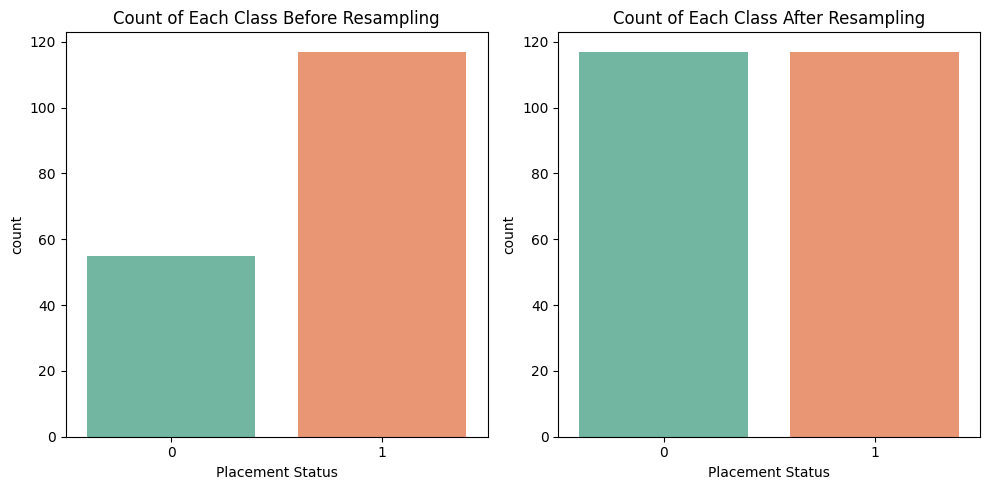

In [75]:
# plot the count plots side by side before and after resampling

# Your code goes here

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_encoded, palette='Set2')
plt.title('Count of Each Class Before Resampling')
plt.xlabel('Placement Status')


plt.subplot(1, 2, 2)
sns.countplot(x=y_train_oversampled, palette='Set2')
plt.title('Count of Each Class After Resampling')
plt.xlabel('Placement Status')
plt.tight_layout()

plt.show()

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**<br> No, we do not need to oversample the testing set. The purpose of oversampling is to address the class imbalance issue in the training set, so that the model can learn from a more balanced representation of the classes. The testing set should reflect the real-world distribution of classes, and oversampling it would introduce artificial bias and potentially lead to inaccurate evaluation of the model's performance. Therefore, it is recommended to keep the testing set as it is, without any oversampling.


In [76]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


In [77]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

pipeline = imbpipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42))
])





In [78]:
# Define stratified k-fold cross validation with five folds

# Your code goes here

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**<br> Stratified K-Folds cross-validation is important because it ensures that each fold of the cross-validation retains the same class distribution as the original dataset. This is particularly important when dealing with imbalanced datasets, as it helps to prevent the model from being trained on unrepresentative samples of the minority class. By stratifying the folds, we can obtain a more accurate estimate of the model's performance across different subsets of the data, and reduce the risk of overfitting or underfitting to specific class distributions.

In [79]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here
param_grid = {

    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'poly', 'sigmoid']
}

In [80]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here
grid_search = GridSearchCV(pipeline, param_grid, cv=skf, scoring='accuracy')



In [81]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
grid_search.fit(X_train_encoded, y_train_encoded)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('classifier', SVC(random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': [1, 0.1, 0.01, 0.001],
                         'classifier__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [82]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
print(f"Mean cross-validated accuracy score of the best estimator: {grid_search.best_score_:.3f}")

Mean cross-validated accuracy score of the best estimator: 1.000


In [83]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
print("Best hyperparameters:")
print(grid_search.best_params_)



Best hyperparameters:
{'classifier__C': 0.1, 'classifier__gamma': 1, 'classifier__kernel': 'poly'}


In [84]:
# Obtain the best estimator selected from the grid search

# Your code goes here
best_estimator = grid_search.best_estimator_



### Model Evaluation

In [85]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_estimator.fit(X_train_scaled, y_train_encoded)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 SVC(C=0.1, gamma=1, kernel='poly', random_state=42))])

In [86]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
y_train_pred = best_estimator.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f"Accuracy of the best estimator on the training set: {train_accuracy:.3f}")



Accuracy of the best estimator on the training set: 1.000


In [87]:
# Calculate the accuracy for the test set

# Your code goes here
y_test_pred = best_estimator.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)
print(f"Accuracy of the best estimator on the test set: {test_accuracy:.3f}")


Accuracy of the best estimator on the test set: 0.977


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:**
<br>The model is not overfitting. The training set accuracy is 1.0, which indicates that the model has learned the training data perfectly. However, the testing set accuracy is 0.977, which is slightly lower than the training set accuracy. This is expected, as the model is evaluated on unseen data, and it is not expected to perform as well as on the training data. The difference between the training and testing set accuracies is not significant, indicating that the model is not overfitting.

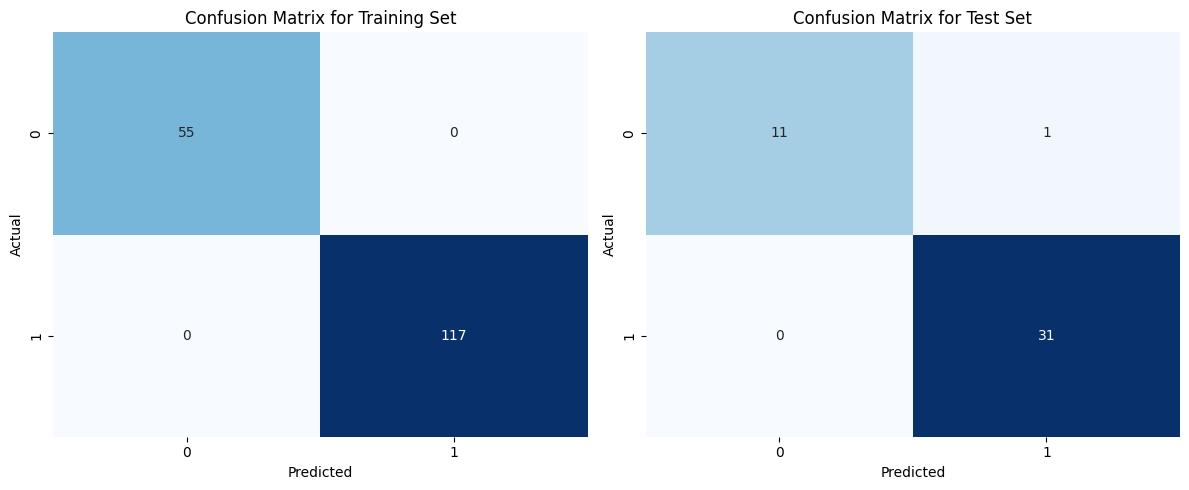

In [88]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here

from sklearn.metrics import confusion_matrix

conf_matrix_train = confusion_matrix(y_train_encoded, y_train_pred)
conf_matrix_test = confusion_matrix(y_test_encoded, y_test_pred)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.subplot(1, 2, 2)

sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', cbar=False, fmt='d')
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


**Q:** Comment about the obtained confusion matrices. <br>
> **A:** The confusion matrices show that the model has performed well in predicting both the "Placed" and "Not Placed" classes. The majority of the predictions are correct, with only a few misclassifications. The true positive and true negative rates are high, indicating that the model has effectively captured the underlying patterns in the data and made accurate predictions.

In [89]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here
class_report = classification_report(y_test_encoded, y_test_pred)
print(class_report)



              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.97      1.00      0.98        31

    accuracy                           0.98        43
   macro avg       0.98      0.96      0.97        43
weighted avg       0.98      0.98      0.98        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:** Precision: The ratio of correctly predicted positive observations to the total predicted positive observations. It is the ability of the classifier not to label as positive a sample that is negative.
<br> Here placed is the positive class and not placed is the negative class. Precision is the ability of the classifier to not label a student as placed when they are not placed.
<br> 1.00 precision for the placed class means that the classifier correctly predicted all the placed students.
<br> Recall: The ratio of correctly predicted positive observations to the all observations in actual class. It is the ability of the classifier to find all the positive samples.
<br> 0.92 recall for the placed class means that the classifier correctly predicted 92% of the placed students.
<br> F1-Score: The weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is the harmonic mean of the precision and recall. 0.96 F1-score for the placed class means that the classifier correctly predicted 96% of the placed students.



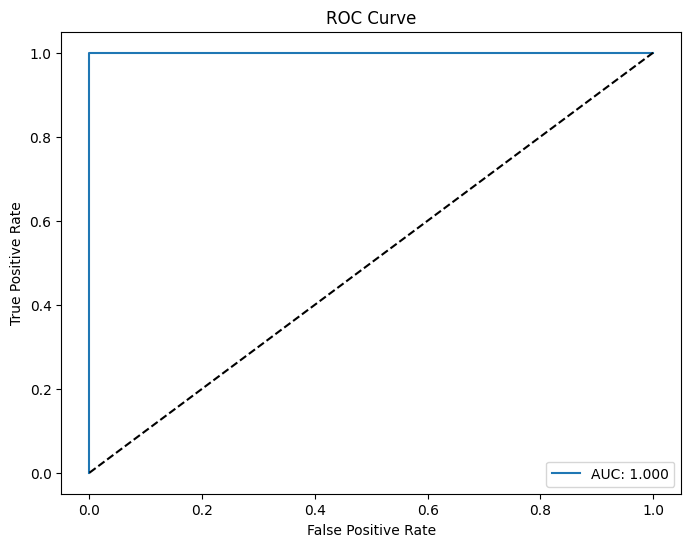

AUC: 1.000


In [90]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here
from sklearn.metrics import roc_curve, roc_auc_score

y_test_prob = best_estimator.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC: {roc_auc_score(y_test_encoded, y_test_prob):.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"AUC: {roc_auc_score(y_test_encoded, y_test_prob):.3f}")


**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:** ROC curve is a graphical representation of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The AUC (Area Under the Curve) value is a single scalar value that represents the area under the ROC curve, which provides a measure of the classifier's ability to distinguish between the positive and negative classes. The AUC value ranges from 0 to 1, where a value of 0.5 indicates a random classifier and a value of 1 indicates a perfect classifier.
<br> So here AUC is 1 which means the model is able to perfectly distinguish between the positive and negative classes, and the ROC curve is a perfect diagonal line. This indicates that the model is performing extremely well, with no false positives or false negatives. However, it is important to note that an AUC of 1 is very rare in practice, and it is possible that the model is overfitting the training data. Therefore, it is recommended to further evaluate the model's performance on unseen data to ensure that it generalizes well.

